# Ch 4 - Training Models

This JN contains the Python code associated with Chapter 4 "Training Models" of the book.

Please refer to the associated notes for more information.

## Linear Regression

Here we write Python code to "solve" a linear regression problem. We simply create and use random linearly-related data to implement our code on.

In [1]:
import numpy as np
from numpy.random import rand, randn

X = 2*rand(100,1)
y = 4+3*X + randn(100,1)

In [3]:
X[:20]

array([[0.60655815],
       [0.89500012],
       [0.66145586],
       [1.47640264],
       [0.24032087],
       [0.23230515],
       [0.63240645],
       [1.35445837],
       [1.23329121],
       [1.82358201],
       [0.42600029],
       [0.81852497],
       [1.00040994],
       [1.18434636],
       [1.04132443],
       [1.95841691],
       [0.94356924],
       [1.63231426],
       [0.10927688],
       [1.35863695]])

In [4]:
y[:20]

array([[ 6.92781475],
       [ 6.7433917 ],
       [ 7.48105057],
       [ 8.38162133],
       [ 4.16214646],
       [ 3.87070159],
       [ 4.5410934 ],
       [ 6.88043123],
       [ 7.05385758],
       [ 9.97837236],
       [ 6.41522175],
       [ 6.62903155],
       [ 5.72851402],
       [ 9.09543385],
       [ 7.73648409],
       [10.08318804],
       [ 6.67503006],
       [ 9.02845652],
       [ 5.41546259],
       [ 8.55191422]])

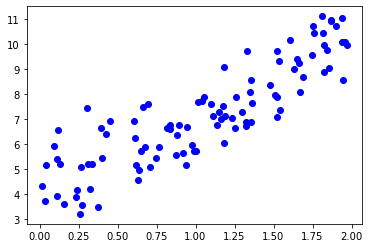

In [6]:
import matplotlib.pyplot as plt

plt.plot(X,y, "bo")

Now, let's find the linear regression model that fits this data with minimial MSE using the normal equation:

In [7]:
X_b = np.c_[np.ones((100,1)), X]

In [8]:
X_b[:20]

array([[1.        , 0.60655815],
       [1.        , 0.89500012],
       [1.        , 0.66145586],
       [1.        , 1.47640264],
       [1.        , 0.24032087],
       [1.        , 0.23230515],
       [1.        , 0.63240645],
       [1.        , 1.35445837],
       [1.        , 1.23329121],
       [1.        , 1.82358201],
       [1.        , 0.42600029],
       [1.        , 0.81852497],
       [1.        , 1.00040994],
       [1.        , 1.18434636],
       [1.        , 1.04132443],
       [1.        , 1.95841691],
       [1.        , 0.94356924],
       [1.        , 1.63231426],
       [1.        , 0.10927688],
       [1.        , 1.35863695]])

In [15]:
from numpy.linalg import inv

theta_parameters = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_parameters

array([[3.98620893],
       [3.04102422]])

So, we have obtained the model parameters

$$ \theta_0 = 3.98620893 \quad\text{and}\quad \theta_1 = 3.04102422 $$

Hence, our linear regression model is simply: $\hat{\theta} = 3.9862 + 3.0410\cdot x$

**Note:** The way that we created the fake data was through the equation $y=4+3x+\text{noise}$, and we see our computed parameters (approximations) are very close to the true values of 4 and 3! Of course, they cannot be exact as the linear regression model cannot deal with random noise.

As usual, once we have our model we can then use it to make predictions!

In [11]:
def lin_reg_model(x):
    return 3.98620893 + 3.04102422 * x

In [38]:
lin_reg_model(5)

19.191330030000003

We can also use the original vector form of the linear model:

In [35]:
X_new = np.array([[5], [0]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 

X_new_b

array([[1., 5.],
       [1., 0.]])

In [36]:
y_predict = X_new_b.dot(theta_parameters)
y_predict

array([[19.19133003],
       [ 3.98620893]])

We can also plot our linear model against the data to visualize how it looks:

(0.0, 2.0, 0.0, 12.0)

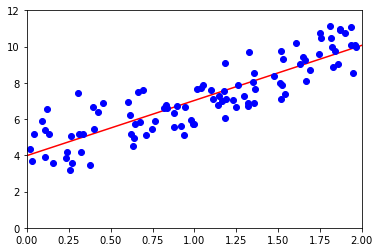

In [37]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "bo")
plt.axis([0,2,0,12])

As usual and as we have already seen, we can use SKL to build a linear regression model automatically:

In [39]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)

LinearRegression()

In [40]:
linear_regression_model.intercept_

array([3.98620893])

In [41]:
linear_regression_model.coef_

array([[3.04102422]])

As expected, we get the same model parameters as when we implemented linear regression from scratch.

**Aside:** As it happens, SKL's 'LinearRegression' class actually uses SciPy's least squares 'linalg.lstsq()' function under-the-hood, so we could have used that instead, as shown below:

In [44]:
from numpy.linalg import lstsq

theta_best_svd, residuals, rank, s = lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.98620893],
       [3.04102422]])

Again, we get the same model parameters as before.

**Aside:** This SciPy function actually uses the Moore-Penrose pseudoinverse, which itself is computed by first finding the singular value decomposition of the matrix in question. Some of the benefits of using this are:
* It is more efficient than using the normal equation
* This method can handle edge cases
    * Normal equation may not work if the matrix $X^TX$ is not invertible!